In [107]:
import numpy as np
import pandas as pd

import os 
for dirname , _ , filenaems in os.walk("Churn_Modelling.csv"):
    for filename in filenames:
        print(os.path.join(dirname , filename))

In [108]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [110]:
df.duplicated().sum()

np.int64(0)

In [111]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [112]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [113]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [114]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)


In [115]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df = pd.get_dummies(df , columns=['Geography' , 'Gender'] , drop_first=True)

In [117]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [118]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)


In [119]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [120]:
X = df.drop(columns=['Exited'])
y  = df['Exited']

In [121]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size=0.2 , random_state=42)

In [122]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [123]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [124]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [126]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [127]:
model  =  Sequential()
model.add(Dense(10,activation='relu', input_dim=11))# input 1 layer
model.add(Dense(5, activation='relu')) #input 2 layer
model.add(Dense(5, activation='relu')) #input 3 layer
model.add(Dense(1, activation='sigmoid'))


c:\Users\chatt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [142]:
model.compile(loss='binary_crossentropy' , optimizer='Adam',metrics=['accuracy'])

In [150]:
history = model.fit(X_train_scaled, y_train, epochs=100 , validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3164 - val_accuracy: 0.8594 - val_loss: 0.3450
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3222 - val_accuracy: 0.8562 - val_loss: 0.3467
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3252 - val_accuracy: 0.8550 - val_loss: 0.3481
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3203 - val_accuracy: 0.8594 - val_loss: 0.3456
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3240 - val_accuracy: 0.8569 - val_loss: 0.3460
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3077 - val_accuracy: 0.8587 - val_loss: 0.3467
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3103 - val_accuracy: 0.8587 - val_loss: 0.3438
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3157 - val_accu

In [151]:
model.layers[0].get_weights()

[array([[-2.78496668e-02, -1.63219556e-01,  7.80369788e-02,
         -1.17766276e-01, -2.86951736e-02, -1.11781150e-01,
          1.26339212e-01,  3.55464280e-01,  8.33101422e-02,
          3.75938177e-01],
        [ 6.50470033e-02, -4.21678901e-01, -5.66638291e-01,
         -9.45516750e-02,  9.97188687e-01,  2.33517066e-02,
         -5.47430038e-01, -1.62942365e-01,  1.51342571e+00,
         -2.62010336e-01],
        [ 8.41215104e-02, -1.79822773e-01,  3.77543084e-02,
          3.39120626e-01,  2.88516492e-01,  4.08530533e-01,
          1.61567017e-01, -3.14373344e-01, -1.42729571e-02,
          5.20935059e-01],
        [-5.47114015e-01, -3.18386078e-01, -2.75421888e-01,
          1.74755022e-01, -4.27408218e-01,  1.50242761e-01,
         -2.36730635e-01, -8.32465768e-01, -3.38636607e-01,
         -6.55018985e-01],
        [-1.69251943e+00, -1.89922288e-01, -4.07207273e-02,
         -6.38598874e-02, -1.83298379e-01,  1.58568227e+00,
         -5.89121103e-01, -4.83404487e-01, -2.452624

In [152]:
model.layers[1].get_weights()

[array([[ 0.8494512 , -0.3914157 ,  0.8074361 , -0.53588045, -0.6851976 ],
        [ 0.19247477,  0.33936197,  0.16457395,  0.30863494,  0.552368  ],
        [-0.5361518 ,  0.99940324,  0.17429346, -0.14672185,  0.10424402],
        [-0.85948884,  0.6173352 , -0.19855438,  0.74379283, -0.04706415],
        [ 0.22050548, -0.41947514, -0.31497535,  0.08884908,  0.8464511 ],
        [ 0.01296296,  0.27315617,  0.8974414 , -0.14423911, -0.05806397],
        [ 0.5217308 ,  0.87234604,  0.1541039 ,  0.32135192, -0.22366266],
        [ 0.13456161,  0.79289097, -0.5299584 , -0.17620908, -0.5906065 ],
        [-0.5060214 , -0.545077  ,  0.25404045, -0.774475  ,  0.50314593],
        [ 0.5821066 , -0.38866726,  0.56727296,  0.7448515 ,  0.8461082 ]],
       dtype=float32),
 array([-0.5560639 ,  0.11718035,  0.5046683 ,  0.5562466 ,  0.30171806],
       dtype=float32)]

In [153]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [154]:
y_pred = np.where(y_log>0.5 , 1, 0)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.857

In [156]:
import matplotlib.pyplot as plt
history.history


{'accuracy': [0.87109375,
  0.8682812452316284,
  0.8700000047683716,
  0.8690624833106995,
  0.8693749904632568,
  0.8696874976158142,
  0.8690624833106995,
  0.871874988079071,
  0.8701562285423279,
  0.870312511920929,
  0.8687499761581421,
  0.8695312738418579,
  0.8696874976158142,
  0.87109375,
  0.8709375262260437,
  0.8723437786102295,
  0.8700000047683716,
  0.8700000047683716,
  0.8695312738418579,
  0.8695312738418579,
  0.87109375,
  0.8709375262260437,
  0.8689062595367432,
  0.8709375262260437,
  0.8712499737739563,
  0.8668749928474426,
  0.8700000047683716,
  0.8693749904632568,
  0.8693749904632568,
  0.8693749904632568,
  0.8709375262260437,
  0.87109375,
  0.8706250190734863,
  0.8682812452316284,
  0.870312511920929,
  0.8696874976158142,
  0.870312511920929,
  0.8692187666893005,
  0.8720312714576721,
  0.8707812428474426,
  0.867968738079071,
  0.8682812452316284,
  0.8690624833106995,
  0.870312511920929,
  0.8684375286102295,
  0.8700000047683716,
  0.8690624833

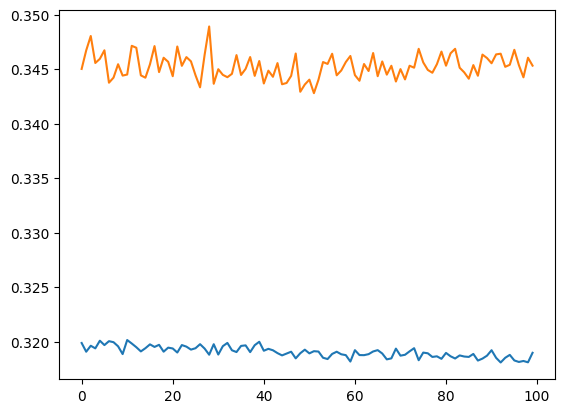

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

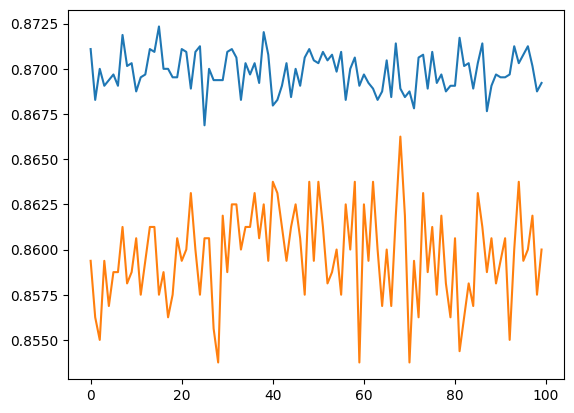

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])